# Chinese restaurant process

[Bayesian mixture models](bayesian_mixture_models.ipynb) introduced how to infer the posterior of the parameters of a mixture model with a fixed number of components $K$. 

We can either find $K$ using model selection, i.e. with AIC, BIC, WAIC, etc., or try to automatically infer this number. Nonparametric mixture models do exactly this. Here we implement a nonparametric Bayesian mixture model for Gaussian random variables using a *Chinese restaurant process* prior(see for instance Nils Hjort's [*Bayesian Nonparametrics*](https://www.cambridge.org/ch/academic/subjects/statistics-probability/statistical-theory-and-methods/bayesian-nonparametrics?format=HB&isbn=9780521513463) or Peter Orbanz' [lecture notes](http://stat.columbia.edu/~porbanz/papers/porbanz_BNP_draft.pdf)).

**As usual I do not take warranty for the correctness or completeness of this document.**

In [16]:
library("e1071")

In [81]:
n <- 1000
alpha <- 100

In [82]:
Z <- integer(100)
curr.tab <- 0
tables <- c()

In [84]:
for (i in seq(n))
{   
    probs <- c(tables / (i - 1 + alpha), alpha / (i - 1 + alpha))
    table <- rdiscrete(1, probs)
    if (table > curr.tab) 
    {
        curr.tab <- curr.tab + 1
        tables <- c(tables, 0)
    }
    Z[i] <- table
    tables[table] <-  tables[table] + 1
}

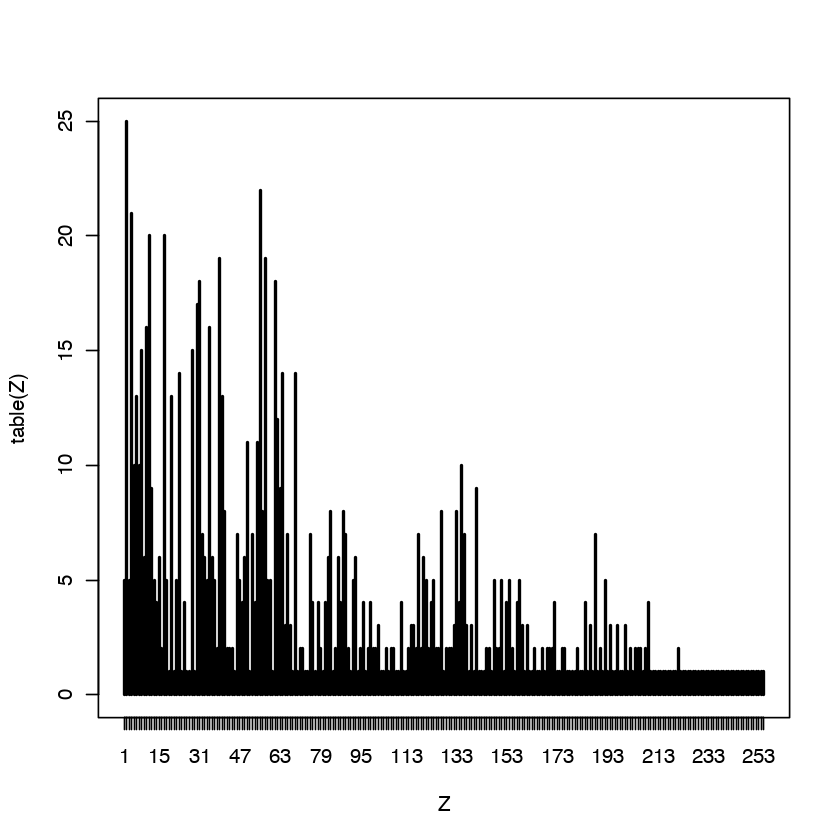

In [85]:
plot(table(Z))